In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the cleaned DataFrame
df = pd.read_parquet('../data/curated/model_data.parquet')

df.head(5)



,bedrooms,bathrooms,propertyTypes,carspaces,latitude,longitude,price,is_furnished,year,SA2_CODE21,...,date_numeric,median_income,distance_to_hospital,distance_to_supermarket,distance_to_park,distance_to_mall,distance_to_CBD,distance_to_school,distance_to_uni,crime
0,1.0,1.0,[apartmentUnitFlat],0.0,-37.815016,144.965968,380.0,0,2011,206041503,...,14,NaN,0.001411,0.002191,0.004031,0.000796,0.003437,0.005759,0.006994,1266.438330
1,2.0,1.0,[apartmentUnitFlat],1.0,-37.816257,144.953288,550.0,0,2011,206041505,...,16,NaN,0.003685,0.002027,0.002119,0.000581,0.013828,0.003552,0.013897,1192.420522
2,1.0,1.0,[apartmentUnitFlat],0.0,-37.821294,144.955768,370.0,0,2011,206041505,...,16,NaN,0.005240,0.003146,0.000254,0.005058,0.011588,0.008511,0.015817,1192.420522
3,2.0,1.0,[apartmentUnitFlat],1.0,-37.760855,144.961691,429.0,0,2011,206011495,...,30,NaN,0.001683,0.001678,0.001734,0.014051,0.057691,0.010984,0.035241,820.152825
4,2.0,1.0,[apartmentUnitFlat],1.0,-37.810074,144.985476,460.0,0,2011,206041119,...,44,NaN,0.000471,0.000370,0.000689,0.009837,0.020259,0.008693,0.020980,835.571731


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the cleaned DataFrame
df = pd.read_parquet('../data/curated/model_data_with_income.parquet')

df.tail(50)

,bedrooms,bathrooms,propertyTypes,carspaces,latitude,longitude,price,is_furnished,year,SA2_CODE21,...,distance_to_hospital,distance_to_supermarket,distance_to_park,distance_to_mall,distance_to_CBD,distance_to_school,distance_to_uni,crime,SA2 Name,Income (Median)
120476,2.0,1.0,[apartmentUnitFlat],2.0,-37.795933,144.940793,530.0,0,2021,206041506,...,0.005789,0.000443,0.000800,0.014420,0.034430,0.003684,0.020654,2664.441390,North Melbourne,55800.0
120477,3.0,1.0,[house],0.0,-37.878546,145.102563,350.0,0,2021,212051319,...,0.014482,0.007604,0.002090,0.009387,0.148378,0.004776,0.033412,960.119370,Ashwood - Chadstone,55016.0
120478,2.0,1.0,[apartmentUnitFlat],1.0,-37.923208,145.128693,330.0,0,2021,212051568,...,0.002497,0.008239,0.002875,0.010115,0.192771,0.008988,0.009550,595.815660,Clayton - Central,40813.0
120479,3.0,1.0,[house],1.0,-37.986232,145.180080,400.0,0,2021,212041565,...,0.007381,0.010068,0.001159,0.007778,0.271326,0.016184,0.086847,1285.248240,Keysborough - North,47279.0
120480,3.0,1.0,[house],1.0,-37.986232,145.180080,400.0,0,2021,212041565,...,0.007381,0.010068,0.001159,0.007778,0.271326,0.016184,0.086847,1285.248240,Keysborough - North,47279.0
120481,3.0,2.0,[house],2.0,-38.117043,145.240760,440.0,0,2022,212031304,...,0.001570,0.001215,0.000853,0.039300,0.405227,0.011816,0.230380,844.086383,Cranbourne West,54674.9
120482,3.0,2.0,[house],2.0,-38.117043,145.240760,440.0,0,2022,212031304,...,0.001570,0.001215,0.000853,0.039300,0.405227,0.011816,0.230380,844.086383,Cranbourne West,54674.9
120483,2.0,1.0,[house],1.0,-37.908757,144.662955,330.0,0,2022,213051368,...,0.007823,0.005357,0.001592,0.005253,0.317180,0.002270,0.317961,684.135180,Werribee - South,57990.7
120484,3.0,2.0,[house],2.0,-38.070831,145.345319,480.0,0,2022,212021553,...,0.008981,0.009934,0.000946,0.009536,0.454887,0.017268,0.264958,675.887296,Berwick - South East,58992.4
120485,3.0,2.0,[house],2.0,-38.070831,145.345319,480.0,0,2022,212021553,...,0.008981,0.009934,0.000946,0.009536,0.454887,0.017268,0.264958,675.887296,Berwick - South East,58992.4


In [2]:
cleaned_df = df.copy()

cleaned_df.drop(columns=['propertyTypes'], inplace=True)
cleaned_df.drop(columns=['days_on_market'], inplace=True)
cleaned_df.drop(columns=['longitude'], inplace=True)
cleaned_df.drop(columns=['latitude'], inplace=True)
cleaned_df.drop(columns=['median_income'], inplace=True)


# Initial count of rows
initial_count = cleaned_df.shape[0]

# Define outlier thresholds
price_threshold = cleaned_df['price'].quantile(0.995)  # Example threshold for high prices
bedrooms_threshold = 6  # Example threshold for maximum bedrooms
bathrooms_threshold = 7  # Example threshold for maximum bathrooms
carspaces_threshold = 4  # Example threshold for maximum carspaces

# Remove outliers based on defined thresholds
filtered_df = cleaned_df[
    (cleaned_df['price'] <= price_threshold) &
    (cleaned_df['bedrooms'] <= bedrooms_threshold) &
    (cleaned_df['bathrooms'] <= bathrooms_threshold) &
    (cleaned_df['carspaces'] <= carspaces_threshold)
]

# Count of rows after filtering
filtered_count = filtered_df.shape[0]

# Print counts before and after
print(f"Initial number of rows: {initial_count}")
print(f"Number of rows after outlier removal: {filtered_count}")

filtered_df.head(5)

Initial number of rows: 120526
Number of rows after outlier removal: 119574


,bedrooms,bathrooms,carspaces,price,is_furnished,year,SA2_CODE21,population,distance_to_bus_stop,distance_to_train_stop,...,bed_bath_interaction,date_numeric,distance_to_hospital,distance_to_supermarket,distance_to_park,distance_to_mall,distance_to_CBD,distance_to_school,distance_to_uni,crime
0,1.0,1.0,0.0,380.0,0,2011,206041503,7939,0.003576,0.003437,...,1.0,14,0.001411,0.002191,0.004031,0.000796,0.003437,0.005759,0.006994,1266.438330
1,2.0,1.0,1.0,550.0,0,2011,206041505,7475,0.001879,0.002518,...,2.0,16,0.003685,0.002027,0.002119,0.000581,0.013828,0.003552,0.013897,1192.420522
2,1.0,1.0,0.0,370.0,0,2011,206041505,7475,0.002997,0.005501,...,1.0,16,0.005240,0.003146,0.000254,0.005058,0.011588,0.008511,0.015817,1192.420522
3,2.0,1.0,1.0,429.0,0,2011,206011495,11981,0.000593,0.001079,...,2.0,30,0.001683,0.001678,0.001734,0.014051,0.057691,0.010984,0.035241,820.152825
4,2.0,1.0,1.0,460.0,0,2011,206041119,5238,0.001944,0.006598,...,2.0,44,0.000471,0.000370,0.000689,0.009837,0.020259,0.008693,0.020980,835.571731


In [3]:

# Define the target variable and features
target = 'price'
features = [col for col in filtered_df.columns if col != target]

# Split the data into train and test sets
train_data = filtered_df[filtered_df['year'].between(2011, 2023)]
test_data = filtered_df[filtered_df['year'] == 2024]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from collections import Counter

# Assume you have separate training and evaluation datasets
# `X_train_full` and `y_train_full` are your 2023 data
# `X_test_full` and `y_test_full` are your 2024 data

# Sample 20% of the training data for each round of grid search
sample_fraction = 0.2

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Store results from different random state runs
results = []
best_params_list = []

# Run multiple rounds of grid search with different random states for data sampling
for run in range(10):
    # Use different random states for each sampling round
    random_state_sample = np.random.randint(0, 1000)

    # Sample the training data
    X_train_sampled, _, y_train_sampled, _ = train_test_split(
        X_train, y_train, train_size=sample_fraction, random_state=random_state_sample
    )

    # Concatenate training and evaluation data to create a single dataset
    X_combined = pd.concat([X_train_sampled, X_test])
    y_combined = pd.concat([y_train_sampled, y_test])

    # Create a predefined split: -1 for train, 0 for test
    test_fold = [-1] * len(X_train_sampled) + [0] * len(X_test)
    ps = PredefinedSplit(test_fold)

    # Initialize the RandomForestRegressor model
    rf_reg = RandomForestRegressor(random_state=42)  # Random state here controls only reproducibility for the RF itself

    # Setup GridSearchCV with the predefined split
    grid_search = GridSearchCV(
        estimator=rf_reg, param_grid=param_grid,
        scoring='neg_root_mean_squared_error', cv=ps, n_jobs=-1, verbose=1
    )

    # Fit the model using the predefined train-test split
    grid_search.fit(X_combined, y_combined)

    # Store the results for this random state
    results.append({
        "random_state_sample": random_state_sample,
        "best_params": grid_search.best_params_,
        "best_score": -grid_search.best_score_  # Negative sign because `neg_root_mean_squared_error` is used
    })

    best_params_list.append(grid_search.best_params_)
    print(f"Run {run + 1}: Best parameters found: {grid_search.best_params_}")
    print(f"Run {run + 1}: Best RMSE score found: {-grid_search.best_score_}")

# Find the most common parameters across runs
most_common_params = Counter(tuple(sorted(p.items())) for p in best_params_list).most_common(1)
print("Most common hyperparameters across runs:", most_common_params)


Fitting 1 folds for each of 216 candidates, totalling 216 fits


KeyboardInterrupt: 

In [4]:

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=250, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and compute RMSE
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE) of Random Forest Regressor: {rmse:.2f}")

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=250, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and compute RMSE
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE) of Random Forest Regressor: {rmse:.2f}")


Root Mean Squared Error (RMSE) of Random Forest Regressor: 82.89
Root Mean Squared Error (RMSE) of Random Forest Regressor: 85.64


In [7]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and compute RMSE
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE) of Random Forest Regressor: {rmse:.2f}")


Root Mean Squared Error (RMSE) of Random Forest Regressor: 82.81


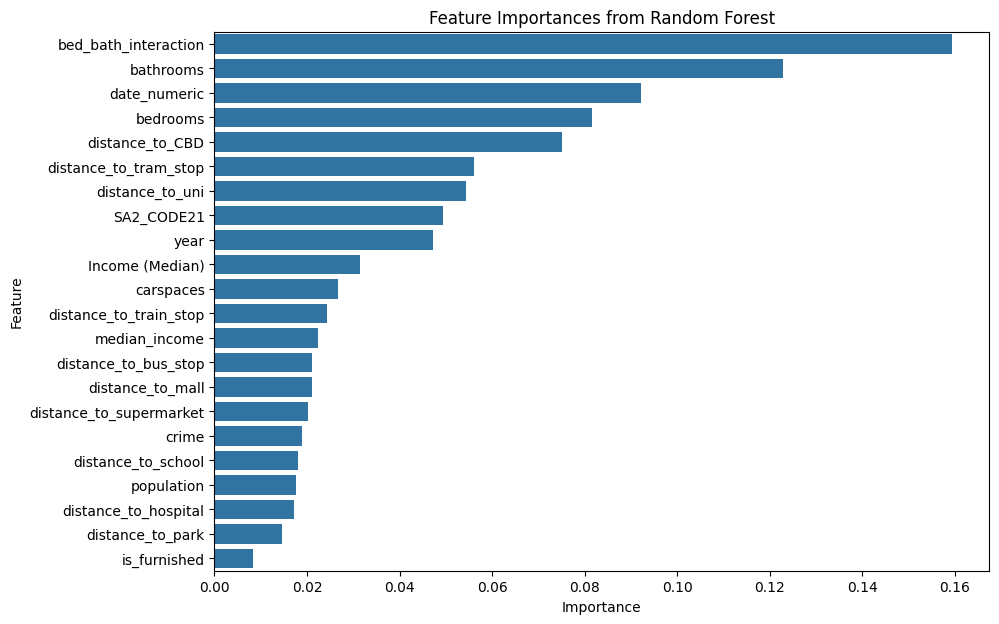

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

In [45]:
import pandas as pd
import numpy as np

# Extract feature importances from the existing model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 12 features
top_features = feature_importance_df.head(16)['Feature'].tolist()
print("Top 16 Features:", top_features)


Top 16 Features: ['bed_bath_interaction', 'bathrooms', 'date_numeric', 'bedrooms', 'distance_to_CBD', 'distance_to_tram_stop', 'distance_to_uni', 'SA2_CODE21', 'year', 'carspaces', 'distance_to_train_stop', 'distance_to_mall', 'distance_to_bus_stop', 'distance_to_supermarket', 'crime', 'population']


In [13]:
# Filter the original data to include only the top 12 features
X_train_top = X_train[selected_features_rfe]
X_test_top = X_test[selected_features_rfe]

# Train a new Random Forest Regressor with the top 12 features
rf_model_top = RandomForestRegressor(n_estimators=250, bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)
rf_model_top.fit(X_train_top, y_train)

# Make predictions and compute RMSE for the new model
y_pred_top = rf_model_top.predict(X_test_top)
rmse_top = np.sqrt(mean_squared_error(y_test, y_pred_top))

print(f"Root Mean Squared Error (RMSE) of Random Forest with Top 12 Features: {rmse_top:.2f}")


Root Mean Squared Error (RMSE) of Random Forest with Top 12 Features: 83.03


In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model_fs = RandomForestRegressor(n_estimators=250, bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)

# Perform RFE
rfe = RFE(estimator=rf_model_fs, n_features_to_select=13)
rfe.fit(X_train, y_train)

# Get selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected features using RFE:", selected_features_rfe)


Selected features using RFE: Index(['bedrooms', 'bathrooms', 'year', 'SA2_CODE21', 'distance_to_bus_stop',
       'distance_to_train_stop', 'distance_to_tram_stop',
       'bed_bath_interaction', 'date_numeric', 'distance_to_supermarket',
       'distance_to_mall', 'distance_to_CBD', 'distance_to_uni'],
      dtype='object')


Feature importances of selected features:
bed_bath_interaction      0.163875
bathrooms                 0.133126
date_numeric              0.124251
distance_to_CBD           0.106260
bedrooms                  0.086910
distance_to_tram_stop     0.079796
distance_to_uni           0.070639
SA2_CODE21                0.065186
year                      0.058166
distance_to_train_stop    0.039610
distance_to_mall          0.037933
distance_to_bus_stop      0.034247
dtype: float64


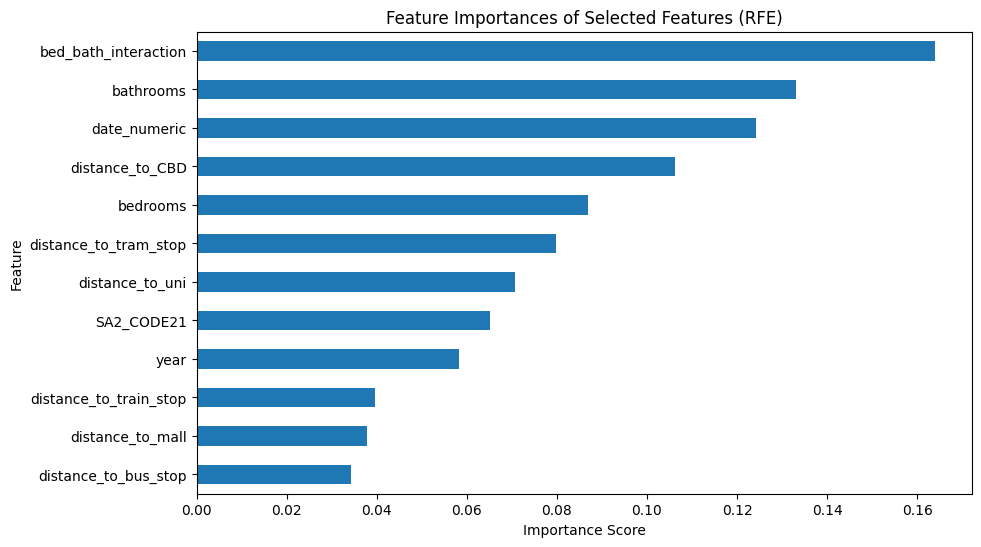

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature importance scores from the model within RFE
feature_importances = rfe.estimator_.feature_importances_

# Map the importance scores to the selected features
selected_feature_importances = pd.Series(feature_importances, index=selected_features_rfe)

# Sort the features by importance in descending order
sorted_importances = selected_feature_importances.sort_values(ascending=False)

# Print or display the sorted importances
print("Feature importances of selected features:")
print(sorted_importances)

# Optionally, plot the feature importances for better visualization
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importances of Selected Features (RFE)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()


/home/robertus/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/robertus/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/robertus/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/robertus/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the r

Optimal number of features: 13
Best RMSE: 9.105915699813943


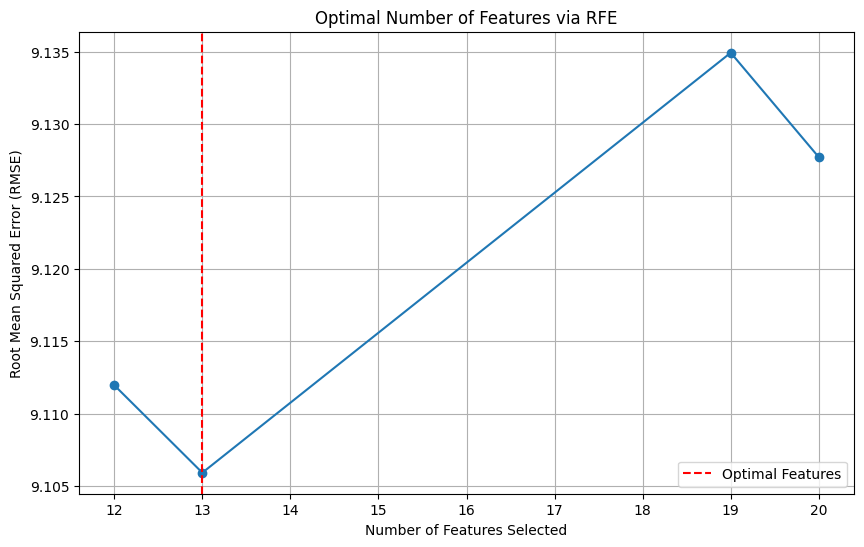

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the model
rf_model_fs = RandomForestRegressor(n_estimators=250, bootstrap=True, max_depth=None, 
                                     max_features='sqrt', min_samples_leaf=1, 
                                     min_samples_split=5, random_state=42)

# Initialize lists to store results
num_features = []
rmses = []

# Define the maximum number of features you want to evaluate
max_features = X_train.shape[1] - 2  # Adjust based on your dataset

feature_list = [12, 13, 19, 20]

# Perform RFE for different numbers of features
for i in feature_list:
    # Perform RFE with the current number of features
    rfe = RFE(estimator=rf_model_fs, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    
    # Get the selected features
    selected_features = X_train.columns[rfe.support_]
    
    # Train the model with selected features
    rf_model_fs.fit(X_train[selected_features], y_train)
    
    # Predict on the test set
    y_pred = rf_model_fs.predict(X_test[selected_features])
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=True))
    
    # Store the results
    num_features.append(i)
    rmses.append(rmse)

# Find the optimal number of features based on RMSE
optimal_features_index = np.argmin(rmses)
optimal_num_features = num_features[optimal_features_index]
optimal_rmse = rmses[optimal_features_index]

# Print results
print(f"Optimal number of features: {optimal_num_features}")
print(f"Best RMSE: {optimal_rmse}")

# Plot the number of features vs. RMSE
plt.figure(figsize=(10, 6))
plt.plot(num_features, rmses, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Optimal Number of Features via RFE')
plt.grid()
plt.axvline(x=optimal_num_features, linestyle='--', color='red', label='Optimal Features')
plt.legend()
plt.show()


In [ ]:
# Filter the original data to include only the top 12 features
X_train_top = X_train[selected_features_rfe]
X_test_top = X_test[selected_features_rfe]

# Train a new Random Forest Regressor with the top 12 features
rf_model_top = RandomForestRegressor(n_estimators=250, bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)
rf_model_top.fit(X_train_top, y_train)

# Make predictions and compute RMSE for the new model
y_pred_top = rf_model_top.predict(X_test_top)
rmse_top = np.sqrt(mean_squared_error(y_test, y_pred_top))

print(f"Root Mean Squared Error (RMSE) of Random Forest with Top 13 Features: {rmse_top:.2f}")

In [8]:
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from collections import Counter

# Assume you have separate training and evaluation datasets
# `X_train_full` and `y_train_full` are your 2023 data
# `X_test_full` and `y_test_full` are your 2024 data

# Sample 20% of the training data for each round of grid search
sample_fraction = 0.2

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Store results from different random state runs
results = []
best_params_list = []

# Run multiple rounds of grid search with different random states for data sampling
for run in range(10):
    # Use different random states for each sampling round
    random_state_sample = np.random.randint(0, 1000)

    # Sample the training data
    X_train_sampled, _, y_train_sampled, _ = train_test_split(
        X_train_top, y_train, train_size=sample_fraction, random_state=random_state_sample
    )

    # Concatenate training and evaluation data to create a single dataset
    X_combined = pd.concat([X_train_sampled, X_test_top])
    y_combined = pd.concat([y_train_sampled, y_test])

    # Create a predefined split: -1 for train, 0 for test
    test_fold = [-1] * len(X_train_sampled) + [0] * len(X_test)
    ps = PredefinedSplit(test_fold)

    # Initialize the RandomForestRegressor model
    rf_reg = RandomForestRegressor(random_state=42)  # Random state here controls only reproducibility for the RF itself

    # Setup GridSearchCV with the predefined split
    grid_search = GridSearchCV(
        estimator=rf_reg, param_grid=param_grid,
        scoring='neg_root_mean_squared_error', cv=ps, n_jobs=-1, verbose=1
    )

    # Fit the model using the predefined train-test split
    grid_search.fit(X_combined, y_combined)

    # Store the results for this random state
    results.append({
        "random_state_sample": random_state_sample,
        "best_params": grid_search.best_params_,
        "best_score": -grid_search.best_score_  # Negative sign because `neg_root_mean_squared_error` is used
    })

    best_params_list.append(grid_search.best_params_)
    print(f"Run {run + 1}: Best parameters found: {grid_search.best_params_}")
    print(f"Run {run + 1}: Best RMSE score found: {-grid_search.best_score_}")

# Find the most common parameters across runs
most_common_params = Counter(tuple(sorted(p.items())) for p in best_params_list).most_common(1)
print("Most common hyperparameters across runs:", most_common_params)

Fitting 1 folds for each of 216 candidates, totalling 216 fits
Run 1: Best parameters found: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Run 1: Best RMSE score found: 91.37505459937792
Fitting 1 folds for each of 216 candidates, totalling 216 fits


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Root Mean Squared Error (RMSE) of Linear Regression Model: {rmse_lr:.2f}")

Root Mean Squared Error (RMSE) of Linear Regression Model: 160.13


don't set random state, run multiple times

In [8]:
# Define the target variable and features
target = 'price'
features = [col for col in filtered_df.columns if col != target]

train_data = filtered_df[filtered_df['year'].between(2011, 2024)]

X_train = train_data[features]
y_train = train_data[target]

test_data = pd.read_csv('../data/curated/test_data.csv')


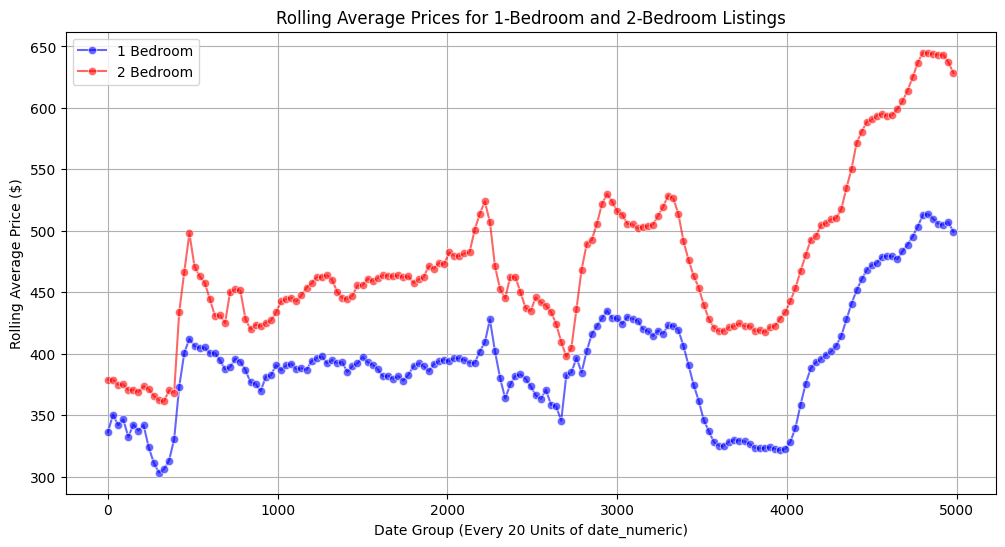

: 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (Replace this with your actual train_data DataFrame)
# train_data = pd.DataFrame({
#     'dateNumeric': [0, 1, 2, 3, 4, 5, 20, 21, 22, 23, 24, 25, 40, 41, 42, 43, 44, 45] * 2,
#     'price': [1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050],
#     'bedrooms': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]
# })

# Assuming train_data is already defined and contains the necessary columns
# The numeric date should be formatted as YYYYMM (e.g., 202301 for January 2023)

# Create a new column to group date_numeric into bins of size 20
train_data['date_group'] = (train_data['date_numeric'] // 30) * 30  # Create groups of 20

# Calculate average price for each date group and bedroom type
average_prices = train_data.groupby(['date_group', 'bedrooms'])['price'].mean().reset_index()

# Separate the DataFrames for 1-bedroom and 2-bedroom listings
bedroom_1_avg = average_prices[average_prices['bedrooms'] == 1].copy()
bedroom_2_avg = average_prices[average_prices['bedrooms'] == 2].copy()

# Rename columns for clarity
bedroom_1_avg.rename(columns={'price': 'avg_price_1'}, inplace=True)
bedroom_2_avg.rename(columns={'price': 'avg_price_2'}, inplace=True)

# Merge the two DataFrames on the date_group
merged_avg = pd.merge(bedroom_1_avg[['date_group', 'avg_price_1']], 
                       bedroom_2_avg[['date_group', 'avg_price_2']], 
                       on='date_group', how='outer')

# Calculate rolling average for the average prices with a window of 3 for smoothing
merged_avg['rolling_avg_1'] = merged_avg['avg_price_1'].rolling(window=3, min_periods=1).mean()
merged_avg['rolling_avg_2'] = merged_avg['avg_price_2'].rolling(window=3, min_periods=1).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for 1-bedroom properties
sns.lineplot(data=merged_avg, x='date_group', y='rolling_avg_1', label='1 Bedroom', color='blue', marker='o', alpha=0.6)

# Plot for 2-bedroom properties
sns.lineplot(data=merged_avg, x='date_group', y='rolling_avg_2', label='2 Bedroom', color='red', marker='o', alpha=0.6)

# Add labels and title
plt.xlabel('Date Group (Every 20 Units of date_numeric)')
plt.ylabel('Rolling Average Price ($)')
plt.title('Rolling Average Prices for 1-Bedroom and 2-Bedroom Listings')
plt.legend()
plt.grid(True)

# Save the plot to a PNG file
plot_path = 'rolling_avg_prices_20_unit_groups.png'
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


In [53]:
train_data.head(50)

,bedrooms,bathrooms,carspaces,price,is_furnished,year,SA2_CODE21,population,distance_to_bus_stop,distance_to_train_stop,...,bed_bath_interaction,date_numeric,distance_to_hospital,distance_to_supermarket,distance_to_park,distance_to_mall,distance_to_CBD,distance_to_school,distance_to_uni,crime
0,1.00,1.00,0.00,380.00,0,2011,206041503,7939,0.00,0.00,...,1.00,14,0.00,0.00,0.00,0.00,0.00,0.01,0.01,1266.44
1,2.00,1.00,1.00,550.00,0,2011,206041505,7475,0.00,0.00,...,2.00,16,0.00,0.00,0.00,0.00,0.01,0.00,0.01,1192.42
2,1.00,1.00,0.00,370.00,0,2011,206041505,7475,0.00,0.01,...,1.00,16,0.01,0.00,0.00,0.01,0.01,0.01,0.02,1192.42
3,2.00,1.00,1.00,429.00,0,2011,206011495,11981,0.00,0.00,...,2.00,30,0.00,0.00,0.00,0.01,0.06,0.01,0.04,820.15
4,2.00,1.00,1.00,460.00,0,2011,206041119,5238,0.00,0.01,...,2.00,44,0.00,0.00,0.00,0.01,0.02,0.01,0.02,835.57
5,1.00,1.00,0.00,370.00,0,2011,206041505,7475,0.00,0.00,...,1.00,54,0.01,0.00,0.00,0.00,0.02,0.00,0.01,1192.42
6,2.00,1.00,1.00,479.00,0,2011,206051513,10751,0.00,0.01,...,2.00,55,0.01,0.01,0.00,0.01,0.05,0.01,0.06,993.73
7,1.00,1.00,0.00,550.00,1,2011,206041504,6401,0.00,0.00,...,1.00,59,0.00,0.00,0.00,0.00,0.01,0.01,0.00,1021.09
8,2.00,1.00,1.00,430.00,0,2011,206011495,11981,0.00,0.00,...,2.00,60,0.00,0.00,0.00,0.01,0.06,0.01,0.04,820.15
9,2.00,1.00,1.00,700.00,1,2011,206041119,5238,0.00,0.01,...,2.00,62,0.00,0.00,0.00,0.01,0.02,0.01,0.02,835.57


In [11]:
test_data.head(10)

,SA2_CODE21,bedrooms,bathrooms,year,distance_to_bus_stop,distance_to_train_stop,distance_to_tram_stop,distance_to_hospital,distance_to_mall,distance_to_park,distance_to_supermarket,distance_to_CBD,distance_to_school,distance_to_uni,population,date_numeric,bed_bath_interaction,carspaces,is_furnished,crime
0,201011006,1,1,2025,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,15294,5295,1,1,1,1210.912850
1,201011006,1,1,2026,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,16366,5660,1,1,0,1290.087583
2,201011006,1,1,2027,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,17341,6025,1,1,0,1366.340312
3,201011006,1,1,2025,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,15294,5295,1,0,0,1210.912850
4,201011006,1,1,2026,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,16366,5660,1,0,1,1290.087583
5,201011006,1,1,2027,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,17341,6025,1,0,1,1366.340312
6,201011006,2,1,2025,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,15294,5295,2,1,1,1210.912850
7,201011006,2,1,2026,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,16366,5660,2,1,0,1290.087583
8,201011006,2,1,2027,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,17341,6025,2,1,0,1366.340312
9,201011006,2,1,2025,0.741864,0.91511,1.091632,0.036647,0.007196,0.00017,0.008238,1.188191,0.03149,1.178579,15294,5295,2,0,0,1210.912850


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# test_features = ['SA2_CODE21', 'bedrooms', 'bathrooms', 'distance_to_bus_stop',
#                  'distance_to_train_stop', 'distance_to_tram_stop', 'population',
#                  'date_numeric', 'bed_bath_interaction', 'carspaces', 'year', 'is_furnished']

# # Filter the original data to include only the top 12 features
# X_train = X_train[selected_features_rfe]

# Train a new Random Forest Regressor with the top 12 features
rf_model = RandomForestRegressor(n_estimators=300, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)





RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=5,
                      n_estimators=300, random_state=42)

In [45]:
train_data.head(1)

,bedrooms,bathrooms,carspaces,price,is_furnished,year,SA2_CODE21,population,distance_to_bus_stop,distance_to_train_stop,...,median_income,distance_to_hospital,distance_to_supermarket,distance_to_park,distance_to_mall,distance_to_CBD,distance_to_school,distance_to_uni,crime,Income (Median)
0,1.0,1.0,0.0,380.0,0,2011,206041503,7939,0.003576,0.003437,...,NaN,0.001411,0.002191,0.004031,0.000796,0.003437,0.005759,0.006994,1266.43833,19363.4


In [53]:
X_train.head(1)

,bedrooms,bathrooms,carspaces,is_furnished,year,SA2_CODE21,population,distance_to_bus_stop,distance_to_train_stop,distance_to_tram_stop,...,median_income,distance_to_hospital,distance_to_supermarket,distance_to_park,distance_to_mall,distance_to_CBD,distance_to_school,distance_to_uni,crime,Income (Median)
0,1.0,1.0,0.0,0,2011,206041503,7939,0.003576,0.003437,0.000591,...,NaN,0.001411,0.002191,0.004031,0.000796,0.003437,0.005759,0.006994,1266.43833,19363.4


In [52]:
test_data.columns()

TypeError: 'Index' object is not callable

In [23]:
test_data.head(5)

,bedrooms,bathrooms,carspaces,is_furnished,year,SA2_CODE21,population,distance_to_bus_stop,distance_to_train_stop,distance_to_tram_stop,...,date_numeric,distance_to_hospital,distance_to_supermarket,distance_to_park,distance_to_mall,distance_to_CBD,distance_to_school,distance_to_uni,crime,Income (Median)
0,1,1,1,0,2025,201011006,15294,0.741864,0.91511,1.091632,...,5295,0.036647,0.008238,0.00017,0.007196,1.188191,0.03149,1.178579,1210.912850,60143.0
1,1,1,1,0,2026,201011006,16366,0.741864,0.91511,1.091632,...,5660,0.036647,0.008238,0.00017,0.007196,1.188191,0.03149,1.178579,1290.087583,61881.8
2,1,1,1,0,2027,201011006,17341,0.741864,0.91511,1.091632,...,6025,0.036647,0.008238,0.00017,0.007196,1.188191,0.03149,1.178579,1366.340312,63620.6
3,1,1,0,0,2025,201011006,15294,0.741864,0.91511,1.091632,...,5295,0.036647,0.008238,0.00017,0.007196,1.188191,0.03149,1.178579,1210.912850,60143.0
4,1,1,0,0,2026,201011006,16366,0.741864,0.91511,1.091632,...,5660,0.036647,0.008238,0.00017,0.007196,1.188191,0.03149,1.178579,1290.087583,61881.8


In [10]:

# Predict on the test data
test_data = test_data[X_train.columns]  # Ensure test_data has the same columns as X_train
test_data['predicted_target'] = rf_model.predict(test_data)

In [35]:
rf_model1 = RandomForestRegressor(n_estimators=250, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, random_state=42)
rf_model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=250, random_state=42)

In [36]:
test_data = test_data[X_train.columns]  # Ensure test_data has the same columns as X_train
test_data['predicted_target'] = rf_model1.predict(test_data)

In [9]:
import pandas as pd

train_data1 = train_data.copy()

# Define the date range for the pandemic period
pandemic_start = (pd.Timestamp('2020-03-15') - pd.Timestamp('2011-01-01')).days
pandemic_end = (pd.Timestamp('2021-11-30') - pd.Timestamp('2011-01-01')).days

# Add the is_pandemic feature
train_data1['is_pandemic'] = ((train_data1['date_numeric'] >= pandemic_start) & 
                              (train_data1['date_numeric'] <= pandemic_end)).astype(int)

# Display the updated DataFrame
print(train_data1[['date_numeric', 'is_pandemic']].head())

# Add the is_pandemic feature to test_data (set all to 0)
test_data1 = test_data.copy()
test_data1['is_pandemic'] = 0


   date_numeric  is_pandemic
0            14            0
1            16            0
2            16            0
3            30            0
4            44            0


In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X_train1 = train_data1[features]
y_train1 = train_data1[target]

# Define the model
rf_model_fs = RandomForestRegressor(n_estimators=250, bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)

# Perform RFE
rfe = RFE(estimator=rf_model_fs, n_features_to_select=13)
rfe.fit(X_train, y_train)

# Get selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected features using RFE:", selected_features_rfe)

# Define the model
rf_model_fs1 = RandomForestRegressor(n_estimators=250, bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=42)

# Perform RFE
rfe1 = RFE(estimator=rf_model_fs, n_features_to_select=13)
rfe1.fit(X_train1, y_train1)

# Get selected features
selected_features_rfe1 = X_train1.columns[rfe1.support_]
print("Selected features using RFE:", selected_features_rfe1)

Selected features using RFE: Index(['bedrooms', 'bathrooms', 'year', 'SA2_CODE21', 'distance_to_bus_stop',
       'distance_to_train_stop', 'distance_to_tram_stop',
       'bed_bath_interaction', 'date_numeric', 'distance_to_supermarket',
       'distance_to_mall', 'distance_to_CBD', 'distance_to_uni'],
      dtype='object')
Selected features using RFE: Index(['bedrooms', 'bathrooms', 'year', 'SA2_CODE21', 'distance_to_bus_stop',
       'distance_to_train_stop', 'distance_to_tram_stop',
       'bed_bath_interaction', 'date_numeric', 'distance_to_supermarket',
       'distance_to_mall', 'distance_to_CBD', 'distance_to_uni'],
      dtype='object')


Feature Importances:
                    Feature  Importance
10     bed_bath_interaction    0.156511
11             date_numeric    0.127944
1                 bathrooms    0.111481
0                  bedrooms    0.079459
4                      year    0.079004
16          distance_to_CBD    0.074583
9     distance_to_tram_stop    0.054717
5                SA2_CODE21    0.054574
18          distance_to_uni    0.053796
2                 carspaces    0.025054
8    distance_to_train_stop    0.024757
15         distance_to_mall    0.022012
7      distance_to_bus_stop    0.021607
13  distance_to_supermarket    0.019710
19                    crime    0.019418
6                population    0.018664
17       distance_to_school    0.017915
12     distance_to_hospital    0.017076
14         distance_to_park    0.014190
3              is_furnished    0.007529


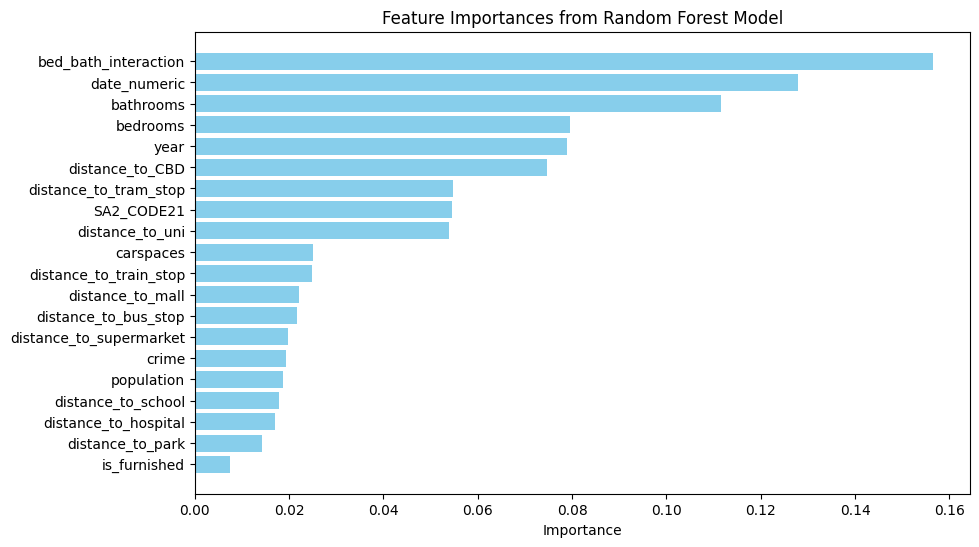

In [16]:
import matplotlib.pyplot as plt

# Check feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [16]:
test_data.head(10)

,bedrooms,bathrooms,year,SA2_CODE21,distance_to_bus_stop,distance_to_train_stop,distance_to_tram_stop,bed_bath_interaction,date_numeric,distance_to_supermarket,distance_to_mall,distance_to_CBD,distance_to_uni,predicted_target
0,1,1,2025,201011006,0.741864,0.91511,1.091632,1,5295,0.008238,0.007196,1.188191,1.178579,301.393056
1,1,1,2026,201011006,0.741864,0.91511,1.091632,1,5660,0.008238,0.007196,1.188191,1.178579,301.393056
2,1,1,2027,201011006,0.741864,0.91511,1.091632,1,6025,0.008238,0.007196,1.188191,1.178579,301.393056
3,1,1,2025,201011006,0.741864,0.91511,1.091632,1,5295,0.008238,0.007196,1.188191,1.178579,301.393056
4,1,1,2026,201011006,0.741864,0.91511,1.091632,1,5660,0.008238,0.007196,1.188191,1.178579,301.393056
5,1,1,2027,201011006,0.741864,0.91511,1.091632,1,6025,0.008238,0.007196,1.188191,1.178579,301.393056
6,2,1,2025,201011006,0.741864,0.91511,1.091632,2,5295,0.008238,0.007196,1.188191,1.178579,423.559722
7,2,1,2026,201011006,0.741864,0.91511,1.091632,2,5660,0.008238,0.007196,1.188191,1.178579,423.559722
8,2,1,2027,201011006,0.741864,0.91511,1.091632,2,6025,0.008238,0.007196,1.188191,1.178579,423.559722
9,2,1,2025,201011006,0.741864,0.91511,1.091632,2,5295,0.008238,0.007196,1.188191,1.178579,423.559722


In [37]:
import pandas as pd
from tabulate import tabulate

# Load population data (or suburb data)
population_df = pd.read_csv('../data/curated/forecasted_populations.csv')

# Ensure 'SA2_CODE21' is numeric
population_df['SA2_CODE21'] = pd.to_numeric(population_df['Code'], errors='coerce')
test_data['SA2_CODE21'] = pd.to_numeric(test_data['SA2_CODE21'], errors='coerce')

# Drop NaN values and duplicates
population_df = population_df.dropna(subset=['SA2_CODE21']).drop_duplicates(subset='SA2_CODE21')

# Create a DataFrame for 2025, 2026, and 2027 prices
pivot_data = test_data.pivot_table(
    index='SA2_CODE21',
    columns='year',
    values='predicted_target'
).reset_index()

# Rename the columns for clarity
pivot_data.columns.name = None  # Remove the column index name
pivot_data.columns = ['SA2_CODE21', 'predicted_price_2025', 'predicted_price_2026', 'predicted_price_2027']

# Calculate actual growth and percentage growth for each SA2
pivot_data['actual_growth'] = pivot_data['predicted_price_2027'] - pivot_data['predicted_price_2025']
pivot_data['percentage_growth'] = (pivot_data['actual_growth'] / pivot_data['predicted_price_2025']) * 100

# Group by SA2_CODE21 to calculate average growth metrics
sa2_growth = pivot_data.groupby('SA2_CODE21').agg({
    'predicted_price_2025': 'mean',
    'predicted_price_2026': 'mean',
    'predicted_price_2027': 'mean',
    'actual_growth': 'mean',
    'percentage_growth': 'mean'
}).reset_index()

# Convert SA2_CODE21 to string to avoid scientific notation
sa2_growth['SA2_CODE21'] = sa2_growth['SA2_CODE21'].astype(int)

# Calculate the count of properties in the training data for each SA2
train_property_counts = train_data.groupby('SA2_CODE21').size().reset_index(name='property_count')

train_property_counts['SA2_CODE21'] = train_property_counts['SA2_CODE21'].astype(int)

# Merge the property count with sa2_growth data
sa2_growth_with_count = sa2_growth.merge(train_property_counts, on='SA2_CODE21', how='left')

# Merge with suburb names
sa2_growth_with_suburb = sa2_growth_with_count.merge(
    population_df[['SA2_CODE21', 'Suburb']], 
    on='SA2_CODE21', 
    how='left'
)

# Sort the districts by the calculated percentage growth
sa2_growth_with_suburb = sa2_growth_with_suburb.sort_values(by='percentage_growth', ascending=False)

# Output the SA2 districts with the highest predicted growth in listing prices using tabulate
print("SA2 districts with the highest predicted actual growth in listing prices from 2025 to 2027 (including property counts):")
print(tabulate(sa2_growth_with_suburb, headers='keys', tablefmt='psql', showindex=False))


SA2 districts with the highest predicted actual growth in listing prices from 2025 to 2027 (including property counts):
+--------------+------------------------+------------------------+------------------------+-----------------+---------------------+------------------+-----------------------------------------------+
|   SA2_CODE21 |   predicted_price_2025 |   predicted_price_2026 |   predicted_price_2027 |   actual_growth |   percentage_growth |   property_count | Suburb                                        |
|--------------+------------------------+------------------------+------------------------+-----------------+---------------------+------------------+-----------------------------------------------|
|    212041563 |                509.739 |                511.846 |                515.916 |     6.177       |         1.2118      |              151 | Dandenong - North                             |
|    210051445 |                484.089 |                488.067 |                48

In [11]:
import pandas as pd
from tabulate import tabulate

# Load population data (or suburb data)
population_df = pd.read_csv('../data/curated/forecasted_populations.csv')

# Ensure 'SA2_CODE21' is numeric
population_df['SA2_CODE21'] = pd.to_numeric(population_df['Code'], errors='coerce')
test_data['SA2_CODE21'] = pd.to_numeric(test_data['SA2_CODE21'], errors='coerce')

# Drop NaN values and duplicates
population_df = population_df.dropna(subset=['SA2_CODE21']).drop_duplicates(subset='SA2_CODE21')

# Create a DataFrame for 2025, 2026, and 2027 prices
pivot_data = test_data.pivot_table(
    index='SA2_CODE21',
    columns='year',
    values='predicted_target'
).reset_index()

# Rename the columns for clarity
pivot_data.columns.name = None  # Remove the column index name
pivot_data.columns = ['SA2_CODE21', 'predicted_price_2025', 'predicted_price_2026', 'predicted_price_2027']

# Calculate actual growth and percentage growth for each SA2
pivot_data['actual_growth'] = pivot_data['predicted_price_2027'] - pivot_data['predicted_price_2025']
pivot_data['percentage_growth'] = (pivot_data['actual_growth'] / pivot_data['predicted_price_2025']) * 100

# Group by SA2_CODE21 to calculate average growth metrics
sa2_growth = pivot_data.groupby('SA2_CODE21').agg({
    'predicted_price_2025': 'mean',
    'predicted_price_2026': 'mean',
    'predicted_price_2027': 'mean',
    'actual_growth': 'mean',
    'percentage_growth': 'mean'
}).reset_index()

# Convert SA2_CODE21 to string to avoid scientific notation
sa2_growth['SA2_CODE21'] = sa2_growth['SA2_CODE21'].astype(int)

# Calculate the count of properties in the training data for each SA2
train_property_counts = train_data.groupby('SA2_CODE21').size().reset_index(name='property_count')

train_property_counts['SA2_CODE21'] = train_property_counts['SA2_CODE21'].astype(int)

# Merge the property count with sa2_growth data
sa2_growth_with_count = sa2_growth.merge(train_property_counts, on='SA2_CODE21', how='left')

# Merge with suburb names
sa2_growth_with_suburb = sa2_growth_with_count.merge(
    population_df[['SA2_CODE21', 'Suburb']], 
    on='SA2_CODE21', 
    how='left'
)

# Sort the districts by the calculated percentage growth
sa2_growth_with_suburb = sa2_growth_with_suburb.sort_values(by='percentage_growth', ascending=False)

# Output the SA2 districts with the highest predicted growth in listing prices using tabulate
print("SA2 districts with the highest predicted actual growth in listing prices from 2025 to 2027 (including property counts):")
print(tabulate(sa2_growth_with_suburb, headers='keys', tablefmt='psql', showindex=False))


SA2 districts with the highest predicted actual growth in listing prices from 2025 to 2027 (including property counts):
+--------------+------------------------+------------------------+------------------------+-----------------+---------------------+------------------+-----------------------------------------------+
|   SA2_CODE21 |   predicted_price_2025 |   predicted_price_2026 |   predicted_price_2027 |   actual_growth |   percentage_growth |   property_count | Suburb                                        |
|--------------+------------------------+------------------------+------------------------+-----------------+---------------------+------------------+-----------------------------------------------|
|    212041563 |                513.071 |                514.284 |                519.778 |      6.7065     |         1.30713     |              151 | Dandenong - North                             |
|    210051445 |                490.277 |                494.059 |                49

In [13]:
# Remove rows where property counts are 50 or less
sa2_growth_filtered = sa2_growth_with_suburb[sa2_growth_with_suburb['property_count'] > 50]

# Print the filtered table again
print("SA2 districts with the highest predicted actual growth in listing prices from 2025 to 2027 (filtered for property counts > 50):")
print(tabulate(sa2_growth_filtered, headers='keys', tablefmt='psql', showindex=False))

# Save the filtered DataFrame to a CSV file
sa2_growth_filtered.to_csv('../data/curated/sa2_growth_filtered.csv', index=False)


SA2 districts with the highest predicted actual growth in listing prices from 2025 to 2027 (filtered for property counts > 50):
+--------------+------------------------+------------------------+------------------------+-----------------+---------------------+------------------+-----------------------------------------------+
|   SA2_CODE21 |   predicted_price_2025 |   predicted_price_2026 |   predicted_price_2027 |   actual_growth |   percentage_growth |   property_count | Suburb                                        |
|--------------+------------------------+------------------------+------------------------+-----------------+---------------------+------------------+-----------------------------------------------|
|    212041563 |                513.071 |                514.284 |                519.778 |      6.7065     |         1.30713     |              151 | Dandenong - North                             |
|    210051445 |                490.277 |                494.059 |          

In [14]:
# Save the test_data DataFrame as a CSV file
test_data.to_csv('../data/curated/test_data_priced.csv', index=False)


In [54]:
import pandas as pd
from tabulate import tabulate

# Define the target variable and features
target = 'price'
features = [col for col in filtered_df.columns if col != target]

# Filter train data between 2011 and 2024
train_data = filtered_df[filtered_df['year'].between(2011, 2024)]

# Prepare the training features and target
X_train = train_data[features]
y_train = train_data[target]

# Load population data (or suburb data)
population_df = pd.read_csv('../data/curated/forecasted_populations.csv')

# Ensure 'SA2_CODE21' is numeric
population_df['SA2_CODE21'] = pd.to_numeric(population_df['Code'], errors='coerce')
train_data['SA2_CODE21'] = pd.to_numeric(train_data['SA2_CODE21'], errors='coerce')
test_data1['SA2_CODE21'] = pd.to_numeric(test_data1['SA2_CODE21'], errors='coerce')

# Create a new DataFrame for 2024 data
train_2024 = train_data[train_data['year'] == 2024]
print(f"Number of SA2s in 2024 train data: {train_2024['SA2_CODE21'].nunique()}")  # Debugging line

# Group by SA2_CODE21 to calculate average price for 2024
avg_price_2024 = train_2024.groupby('SA2_CODE21')['price'].mean().reset_index()
avg_price_2024.rename(columns={'price': 'avg_price_2024'}, inplace=True)
print(f"Average price data for 2024: {avg_price_2024.head()}")  # Debugging line

# Create a DataFrame for average price in 2023
train_2023 = train_data[train_data['year'] == 2023]
avg_price_2023 = train_2023.groupby('SA2_CODE21')['price'].mean().reset_index()
avg_price_2023.rename(columns={'price': 'avg_price_2023'}, inplace=True)
print(f"Average price data for 2023: {avg_price_2023.head()}")  # Debugging line

# Create a DataFrame for predicted prices in 2025 from test_data, grouped by SA2
predicted_price_2025 = test_data1.groupby('SA2_CODE21')['predicted_target'].mean().reset_index()
predicted_price_2025.rename(columns={'predicted_target': 'predicted_price_2025'}, inplace=True)
print(f"Predicted prices data for 2025: {predicted_price_2025.head()}")  # Debugging line

# Merge the average price for 2024 with predicted prices for 2025
merged_data = avg_price_2024.merge(predicted_price_2025, on='SA2_CODE21', how='left')
print(f"Merged data before filtering: {merged_data.head()}")  # Debugging line

# Merge the 2023 average price
merged_data = merged_data.merge(avg_price_2023, on='SA2_CODE21', how='left')

# Calculate actual growth and percentage growth for each SA2
merged_data['actual_growth'] = merged_data['predicted_price_2025'] - merged_data['avg_price_2024']
merged_data['percentage_growth'] = (merged_data['actual_growth'] / merged_data['avg_price_2024']) * 100

# Merge with suburb names
sa2_growth_with_suburb = merged_data.merge(
    population_df[['SA2_CODE21', 'Suburb']], 
    on='SA2_CODE21', 
    how='left'
)

# Sort the districts by the calculated actual growth
sa2_growth_with_suburb = sa2_growth_with_suburb.sort_values(by='percentage_growth', ascending=False)

# Output the SA2 districts with the highest predicted growth in listing prices using tabulate
print("SA2 districts with the highest predicted actual growth in listing prices from 2024 to 2025:")
print(tabulate(sa2_growth_with_suburb, headers='keys', tablefmt='psql', showindex=False))

# Debugging output: Final DataFrame size
print(f"Total number of SA2 districts after all operations: {sa2_growth_with_suburb.shape[0]}")  # Debugging line


Number of SA2s in 2024 train data: 312
Average price data for 2024:    SA2_CODE21  avg_price_2024
0   203021037           290.0
1   203021040           480.0
2   203021043          1200.0
3   203021046           410.0
4   203031489           520.0
Average price data for 2023:    SA2_CODE21  avg_price_2023
0   203021039           632.5
1   203021040           420.0
2   203021046           400.0
3   203021487           515.0
4   203031053           440.0
Predicted prices data for 2025:    SA2_CODE21  predicted_price_2025
0   201011006            365.971964
1   201011483            362.749115
2   203011034            365.693242
3   203011035            374.618822
4   203011036            372.990198
Merged data before filtering:    SA2_CODE21  avg_price_2024  predicted_price_2025
0   203021037           290.0            357.256543
1   203021040           480.0            356.379376
2   203021043          1200.0            382.250581
3   203021046           410.0            358.911084
4   2

In [38]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Load test data
test_data = pd.read_csv('../data/curated/test_data.csv')

# Define the features you used for test data
test_features = ['SA2_CODE21', 'bedrooms', 'bathrooms', 'distance_to_bus_stop',
                 'distance_to_train_stop', 'distance_to_tram_stop', 'population',
                 'date_numeric', 'bed_bath_interaction', 'carspaces', 'year', 'is_furnished']

# Filter test data to include only the required features
test_features_df = test_data[test_features]


In [39]:
# Define the target variable and features
target = 'price'

# Split the data into train and test sets
train_data = cleaned_df

# Ensure 'SA2_CODE21' is in integer format
train_data['SA2_CODE21'] = train_data['SA2_CODE21'].astype(int)
test_data['SA2_CODE21'] = test_data['SA2_CODE21'].astype(int)

X_train = train_data[test_features]
y_train = train_data[target]
X_test = test_data[test_features]



In [41]:
# Predict on the test data
y_pred_xgb = xgb_model.predict(test_features_df)

# Add predictions to the test data
test_data['predicted_target'] = y_pred_xgb

import pandas as pd
import numpy as np
import xgboost as xgb

# Load and preprocess test_data as required
# Assuming `test_data` has been preprocessed and contains the same feature columns as X_train

# Ensure test_data has the same columns as X_train
test_data = test_data[X_train.columns]

# Make predictions using the trained XGBoost model
test_data['price'] = xgb_model.predict(test_data)

# Create a column for the reference date and generate a 'date_numeric' column
reference_date = pd.Timestamp('2011-01-01')
test_data['date_numeric'] = pd.to_datetime(pd.DataFrame({
    'year': [2025]*len(test_data),
    'month': [7]*len(test_data),  # Middle of the year
    'day': [1]*len(test_data)     # Arbitrary day
})) - reference_date
test_data['date_numeric'] = test_data['date_numeric'].dt.days

# Calculate the average growth per SA2 district
# Assuming 'SA2_CODE21' is the column that identifies the district
# The growth is calculated as the difference in predicted prices between 2025 and 2027

# Create a pivot table to get average prices for each SA2_CODE21 and year
pivot_df = test_data.pivot_table(index='SA2_CODE21', columns='year', values='price', aggfunc='mean')

# Calculate the growth from 2025 to 2027
pivot_df['growth_2025_2027'] = pivot_df[2027] - pivot_df[2025]

# Sort the districts by the calculated growth
sa2_growth = pivot_df[['growth_2025_2027']].sort_values(by='growth_2025_2027', ascending=False)

# Display the SA2 districts with the highest predicted growth in listing prices
print("SA2 districts with the highest predicted growth in listing prices from 2025 to 2027:")
print(sa2_growth.head())


SA2 districts with the highest predicted growth in listing prices from 2025 to 2027:
year        growth_2025_2027
SA2_CODE21                  
206061135          59.984375
213031351          58.163269
206041506          47.182251
210031538          43.334778
208021180          40.115723


In [42]:
# Create a column for the reference date and generate a 'date_numeric' column
reference_date = pd.Timestamp('2011-01-01')
test_data['date_numeric'] = pd.to_datetime(pd.DataFrame({
    'year': [2025]*len(test_data),
    'month': [7]*len(test_data),  # Middle of the year
    'day': [1]*len(test_data)     # Arbitrary day
})) - reference_date
test_data['date_numeric'] = test_data['date_numeric'].dt.days

# Create a pivot table to get average prices for each SA2_CODE21 and year
pivot_df = test_data.pivot_table(index='SA2_CODE21', columns='year', values='price', aggfunc='mean')

# Calculate the absolute and percentage growth from 2025 to 2027
pivot_df['growth_absolute'] = pivot_df[2027] - pivot_df[2025]
pivot_df['growth_percentage'] = (pivot_df['growth_absolute'] / pivot_df[2025]) * 100

# Sort the districts by the calculated percentage growth
sa2_growth = pivot_df[['growth_percentage']].sort_values(by='growth_percentage', ascending=False)

# Display the SA2 districts with the highest predicted growth percentage in listing prices
print("SA2 districts with the highest predicted growth percentage in listing prices from 2025 to 2027:")
print(sa2_growth.head())

SA2 districts with the highest predicted growth percentage in listing prices from 2025 to 2027:
year        growth_percentage
SA2_CODE21                   
213031351           10.649911
210031538            8.517753
213051368            8.479545
206061135            7.842418
213051467            7.819542


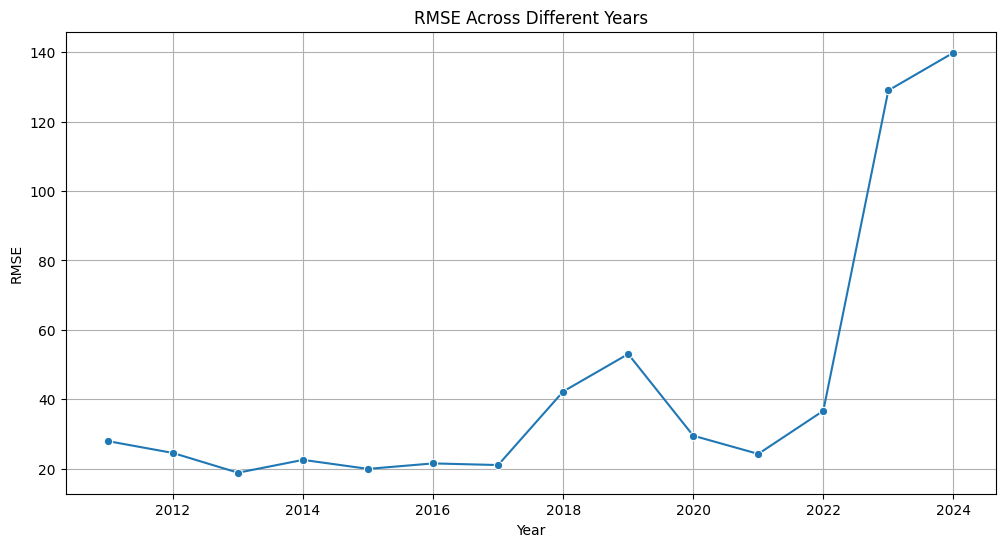

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the entire dataset
cleaned_df['predicted_price'] = rf_model.predict(cleaned_df[features])
cleaned_df['residual'] = cleaned_df['price'] - cleaned_df['predicted_price']
cleaned_df['rmse'] = cleaned_df['residual'] ** 2

# Calculate RMSE per year
rmse_by_year = cleaned_df.groupby('year')['rmse'].mean().reset_index()
rmse_by_year['rmse'] = np.sqrt(rmse_by_year['rmse'])

# Plot RMSE across years
plt.figure(figsize=(12, 6))
sns.lineplot(data=rmse_by_year, x='year', y='rmse', marker='o')
plt.title('RMSE Across Different Years')
plt.xlabel('Year')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()
